In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')
X = data.iloc[:, 3:5].values

In [72]:
# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to initialize centroids randomly
def initialize_centroids(X, k):
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

# Function to assign clusters based on closest centroids
def assign_clusters(X, centroids):
    clusters = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        distances = [calculate_distance(X[i], centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

# Function to update centroids based on cluster assignments
def update_centroids(X, clusters, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[clusters == i]
        new_centroids[i] = np.mean(points_in_cluster, axis=0)
    return new_centroids

In [73]:

# K-means algorithm
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Function to calculate within-cluster sum of squares (WCSS)
def calculate_wcss(X, clusters, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss


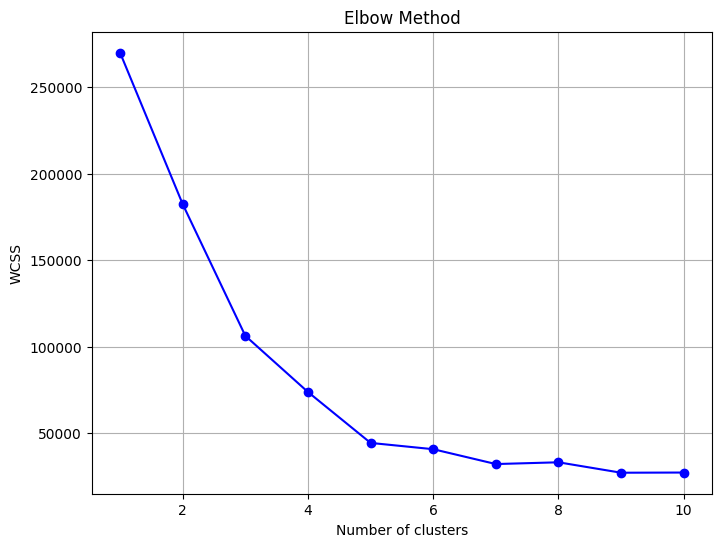

In [74]:
# Elbow method to find the optimal number of clusters
def elbow_method(X, max_k):
    wcss = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans(X, k)
        wcss.append(calculate_wcss(X, clusters, centroids))

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), wcss, 'bo-')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.savefig('elbow_method.png')
    plt.show()

# Determining the optimal number of clusters using the elbow method
max_k = 10
elbow_method(X, max_k)

# Setting the number of clusters
num_clusters = 3
centroids, clusters = kmeans(X, num_clusters)


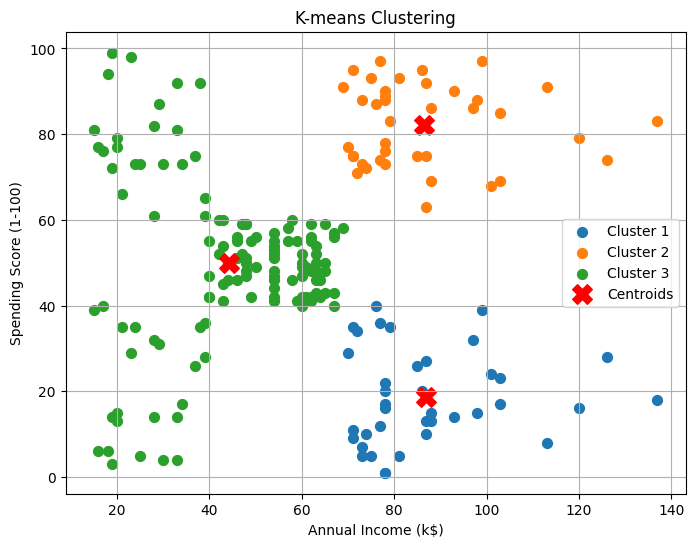

In [75]:
# Function to plot the clusters
def plot_clusters(X, clusters, centroids):
    plt.figure(figsize=(8, 6))
    for i in range(len(centroids)):
        points = X[clusters == i]
        plt.scatter(points[:, 0], points[:, 1], s=50, label=f'Cluster {i + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')
    plt.title('K-means Clustering')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid(True)
    plt.savefig('kmeans_clusters.png')
    plt.show()

# Plotting the clusters
plot_clusters(X, clusters, centroids)
